# PROBLEM STATEMENT

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

##### The company wants to know:

##### 1)Which variables are significant in predicting the demand for shared bikes.
##### 2) How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the bike dataset.
Then import all the necessary libraries required to built the model.

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error



In [2]:
# Read the data set
df = pd.read_csv(r"C:\Users\Nmahanta\Desktop\jupiter\day (1).csv")

### Data Summary
As a first step lets do three simple steps on the dataset:

1. Get a glimpse of data by printing few rows of it.
2. Size of the dataset
3. What type of variables contribute our data

In [3]:
# Print few rows of data-set
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [4]:
# Size of data-set
df.shape

(730, 16)

In [5]:
# Type of variables that contribute to the data-set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check if there is any null-values exist
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Notes:
1. There is no null values in the data-set.
2. There are some data variables which are categorical type, but given 'int' type. Let's convert them to 'categorical' type.


In [7]:
df_cat = ["season","weathersit"]
for var in df_cat:
    df[var] = df[var].astype("category")


The variables in columns 'season' and 'weathersit' are represented by 1,2,3,4 which has some meanings. That's why the columns are 'int' type. Let's convert those integers with their respective meanings so that it will be easy to ready them later.

1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
2. weathersit : 
		- 1: Clear
		- 2: Mist_Cloudy
		- 3: Light_Rain_Snow
		- 4: Heavy_Rain_Snow

In [8]:
df["season"]=df["season"].replace({1:"spring",2:"summer",3:"fall",4:"winter"})
df["weathersit"]=df["weathersit"].replace({1:"Clear",2:"Mist_Cloudy",3:"Light_Rain_Snow",4:"Heavy_Rain_Snow"})

There are two columns for temperature. Let's check the correlation between them and check if we can use just one column instead of both.

In [9]:
df['temp'].corr(df['atemp'])


0.9916961786905648

As we can see correlation coefficient value for temp and atemp is 0.99, which is nearly 1. So we can use just one column.

1. From the data-set, we can see the columns  'yr' and 'mnth' represent column 'dteday'. So we can drop 'dteday' column.
2. 'instant' column represent record index, which is not useful.Drop that column.
3. Here 'cnt' or 'count' which is the total number of bikes rented, is our target variable. Sum of columns 'casual' and 'registered' is equal to 'cnt'. So we can drop those both columns
4. Drop 'atemp' column as we will use 'temp' column furthur.

In [10]:
df1=df.drop({'instant','dteday','temp','casual','registered'},axis=1)

In [11]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist_Cloudy,18.1812,80.5833,10.7499,985
1,spring,0,1,0,2,1,Mist_Cloudy,17.6869,69.6087,16.6521,801
2,spring,0,1,0,3,1,Clear,9.4703,43.7273,16.6367,1349
3,spring,0,1,0,4,1,Clear,10.6061,59.0435,10.7398,1562
4,spring,0,1,0,5,1,Clear,11.4635,43.6957,12.5223,1600


Now that we have our final data-set, let's rename the column names for better understanding.

In [12]:
df1.rename(columns={'yr':'year','mnth':'month','atemp':'temperature','hum':'humidity','cnt':'count','weathersit':'weather'},inplace=True)

In [13]:
df1.describe()

,year,month,holiday,weekday,workingday,temperature,humidity,windspeed,count
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,0.5000,6.5260,0.0288,2.9959,0.6904,23.7263,62.7652,12.7636,4508.0068
std,0.5003,3.4502,0.1673,2.0003,0.4626,8.1503,14.2376,5.1958,1936.0116
min,0.0000,1.0000,0.0000,0.0000,0.0000,3.9535,0.0000,1.5002,22.0000
25%,0.0000,4.0000,0.0000,1.0000,0.0000,16.8897,52.0000,9.0417,3169.7500
50%,0.5000,7.0000,0.0000,3.0000,1.0000,24.3682,62.6250,12.1253,4548.5000
75%,1.0000,10.0000,0.0000,5.0000,1.0000,30.4458,72.9896,15.6256,5966.0000
max,1.0000,12.0000,1.0000,6.0000,1.0000,42.0448,97.2500,34.0000,8714.0000


Here, we can see minimum value of humidity is 0, which is practically impossible for planet earth. So check the row and drop that.

In [14]:
#drop humidity=0
df1[df1['humidity']==0]
#df1['humidity']

,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,count
68,spring,0,3,0,6,0,Light_Rain_Snow,19.2834,0.0000,17.5458,623


In [15]:
#Given the conditions of earth, Humidity can never be zero. Lets drop this row to ensure we normalise the humidity.
df1=df1[~(df1['humidity']==0)]

## Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it.
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

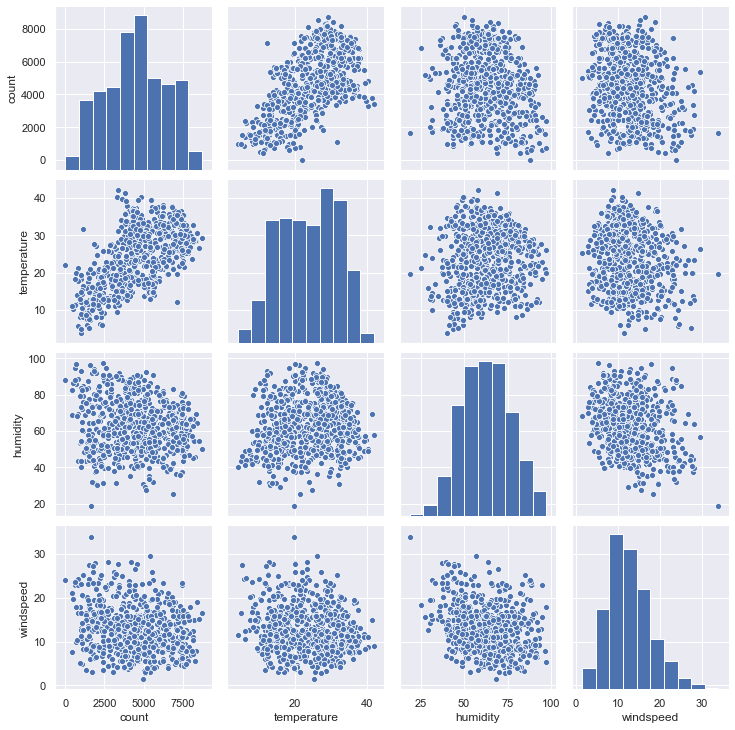

In [16]:
sns.pairplot(df1[['count','temperature','humidity','windspeed']])
plt.show()

Inference:
    

1. Looking at the correlation between Count and Temperature, number of bike rents increases with increase in temperature.
2. For Humidity and Windspeed, Count seems to be distributed uniformly(without a pattern).


#### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.



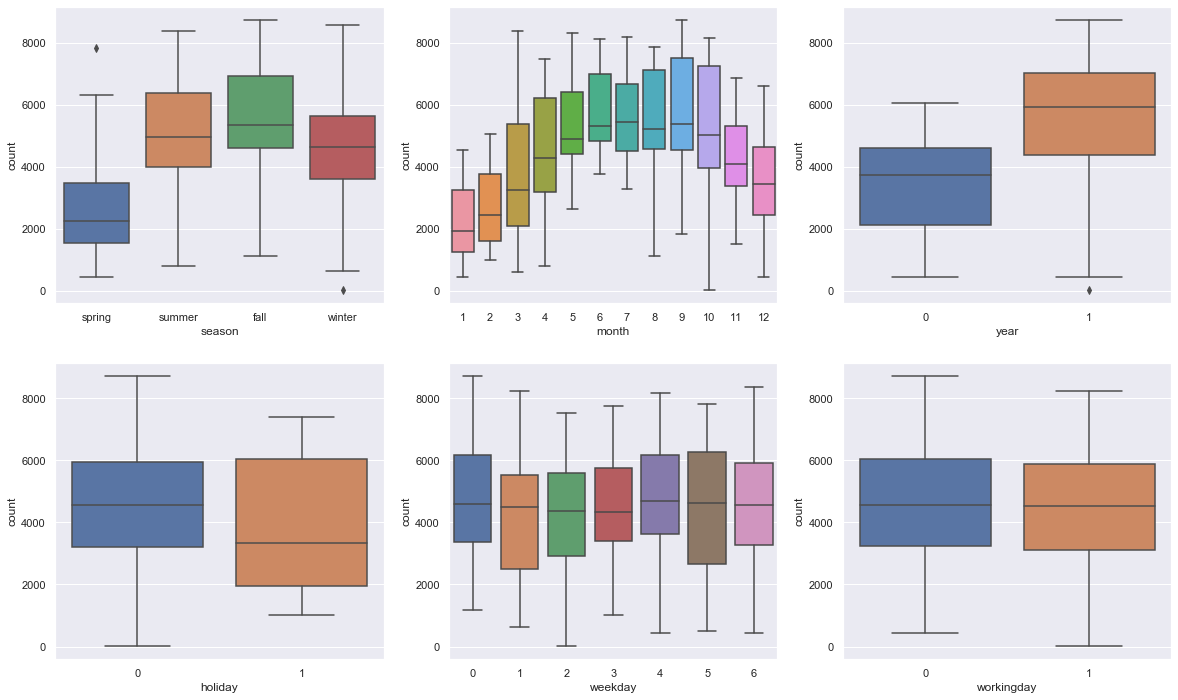

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = df1)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = df1)
plt.subplot(2,3,3)
sns.boxplot(x = 'year', y = 'count', data = df1)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = df1)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = df1)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = df1)
plt.show()

Inference:

1. Bike demand is the lowest in spring season.
2. Bike rent has been increased in the year 2019 from the previous year 2018.
3. Median value of rented bikes is similar throughout the weekend.
4. Lower Bike rent counts have been observed at the start and end of the year while between June and October, they are the highest.
5. Median value of count is less on holidays but same for working and non-working days.




We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `weather` with `workingday` as the hue.

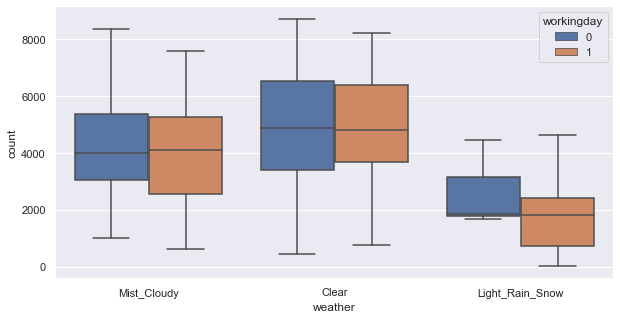

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weather', y = 'count', hue = 'workingday', data = df1)
plt.show()

Here, we can observe that the median value of total number of bikes booked for rent is same in each weather condition irrespective of working day or not working day. But the count is less in light_rain_snow than the clear and mist_cloudy weather. May be most people don't rent bikes when there is rain and snow outside.

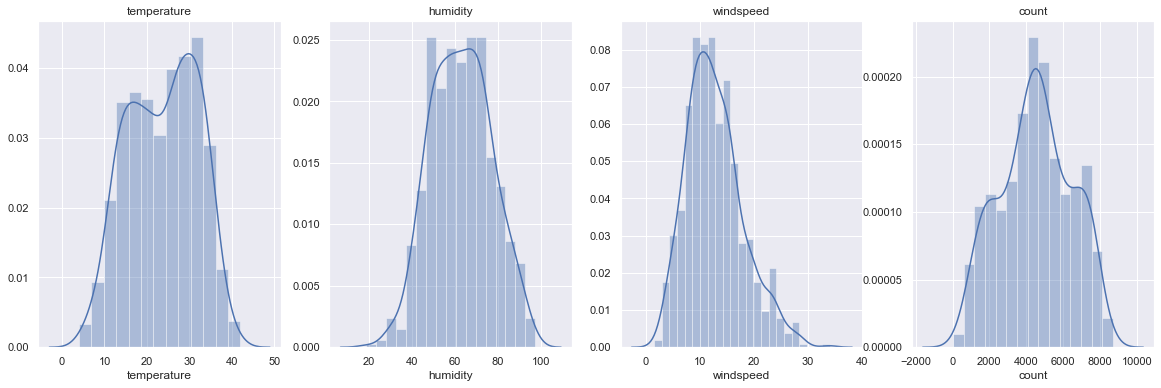

In [19]:
#distribution of numeric columns:
plt.figure(figsize=(20,6))
features = ['temperature','humidity','windspeed','count']
for i in enumerate(features):
    plt.subplot(1,4,i[0]+1)
    sns.distplot(df1[i[1]])
    plt.title(i[1])
plt.show()    

The numerical features are not seem to br normally distributed.We need to scale them.

## Step 3: Dummy Variables
The variable 'weather situation' has 3 levels,'season' has 4 levels, 'month' has 12 levels, 'weekday' has 7 levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables` and we will use drop_first=True, because if we are creating 3 dummy columns for 4 levels, then for the level where all three dummy value will be 0, then automatically that means it belongs to 4th level, so we don't need to keep that.

In [20]:
#Creating dummies for Season
dummies=pd.get_dummies(df1['season'], drop_first = True)
for i in dummies.columns:
    df1['season'+'_'+str(i)]=dummies[i]
df1.drop(columns={'season'},inplace=True)

In [21]:
#Creating Dummies for Weather Situation
dummies=pd.get_dummies(df1['weather'],drop_first=True)
for i in dummies.columns:
    df1['weather'+'_'+str(i)]=dummies[i]
df1.drop(columns={'weather'},inplace=True)

In [22]:
#Creating Dummies for Month
dummies=pd.get_dummies(df1['month'],drop_first=True)
for i in dummies.columns:
    df1['month'+'_'+str(i)]=dummies[i]
df1.drop(columns={'month'},inplace=True)

In [23]:
#Creating Dummies for Month
dummies=pd.get_dummies(df1['weekday'],drop_first=True)
for i in dummies.columns:
    df1['weekday'+'_'+str(i)]=dummies[i]
df1.drop(columns={'weekday'},inplace=True)

In [24]:
#Checking the columns
df1.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,season_spring,season_summer,season_winter,weather_Light_Rain_Snow,weather_Mist_Cloudy,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,1,18.1812,80.5833,10.7499,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,17.6869,69.6087,16.6521,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,9.4703,43.7273,16.6367,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,10.6061,59.0435,10.7398,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.4635,43.6957,12.5223,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


##### Now since our data is ready to perform Linear Regression , let's start !!!

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [25]:
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
It is extremely important to rescale the numerical-variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.


In [26]:
# Inspecting the train data
df_train.head(3)

,year,holiday,workingday,temperature,humidity,windspeed,count,season_spring,season_summer,season_winter,weather_Light_Rain_Snow,weather_Mist_Cloudy,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
626,1,0,1,27.0202,53.6667,14.4167,7591,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
364,0,0,1,20.7061,61.5833,14.7503,2485,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.7923,4066,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the columns except the 0,1 and 'dummy' variables
num_vars = ['temperature', 'humidity', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [29]:
# Re-inspecting the columns after scaling
df_train.head(3)

,year,holiday,workingday,temperature,humidity,windspeed,count,season_spring,season_summer,season_winter,weather_Light_Rain_Snow,weather_Mist_Cloudy,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
626,1,0,1,0.6356,0.4502,0.3716,7591,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
364,0,0,1,0.4616,0.5524,0.3823,2485,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
426,1,0,0,0.4607,0.5594,0.2553,4066,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train.describe()

,year,holiday,workingday,temperature,humidity,windspeed,count,season_spring,season_summer,season_winter,weather_Light_Rain_Snow,weather_Mist_Cloudy,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.5118,0.0275,0.6882,0.5412,0.5717,0.3180,4542.2863,0.2431,0.2431,0.2471,0.0216,0.3490,0.0667,0.0941,0.0745,0.0902,0.0745,0.0804,0.0902,0.0882,0.0804,0.0824,0.0941,0.1392,0.1510,0.1431,0.1373,0.1412,0.1471
std,0.5004,0.1636,0.4637,0.2213,0.1825,0.1706,1952.4267,0.4294,0.4294,0.4317,0.1454,0.4771,0.2497,0.2923,0.2629,0.2867,0.2629,0.2722,0.2867,0.2839,0.2722,0.2752,0.2923,0.3465,0.3584,0.3506,0.3445,0.3485,0.3545
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,431.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.3572,0.4318,0.1928,3191.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,0.0000,1.0000,0.5529,0.5756,0.2968,4556.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.7313,0.7047,0.4141,6111.7500,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,8714.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


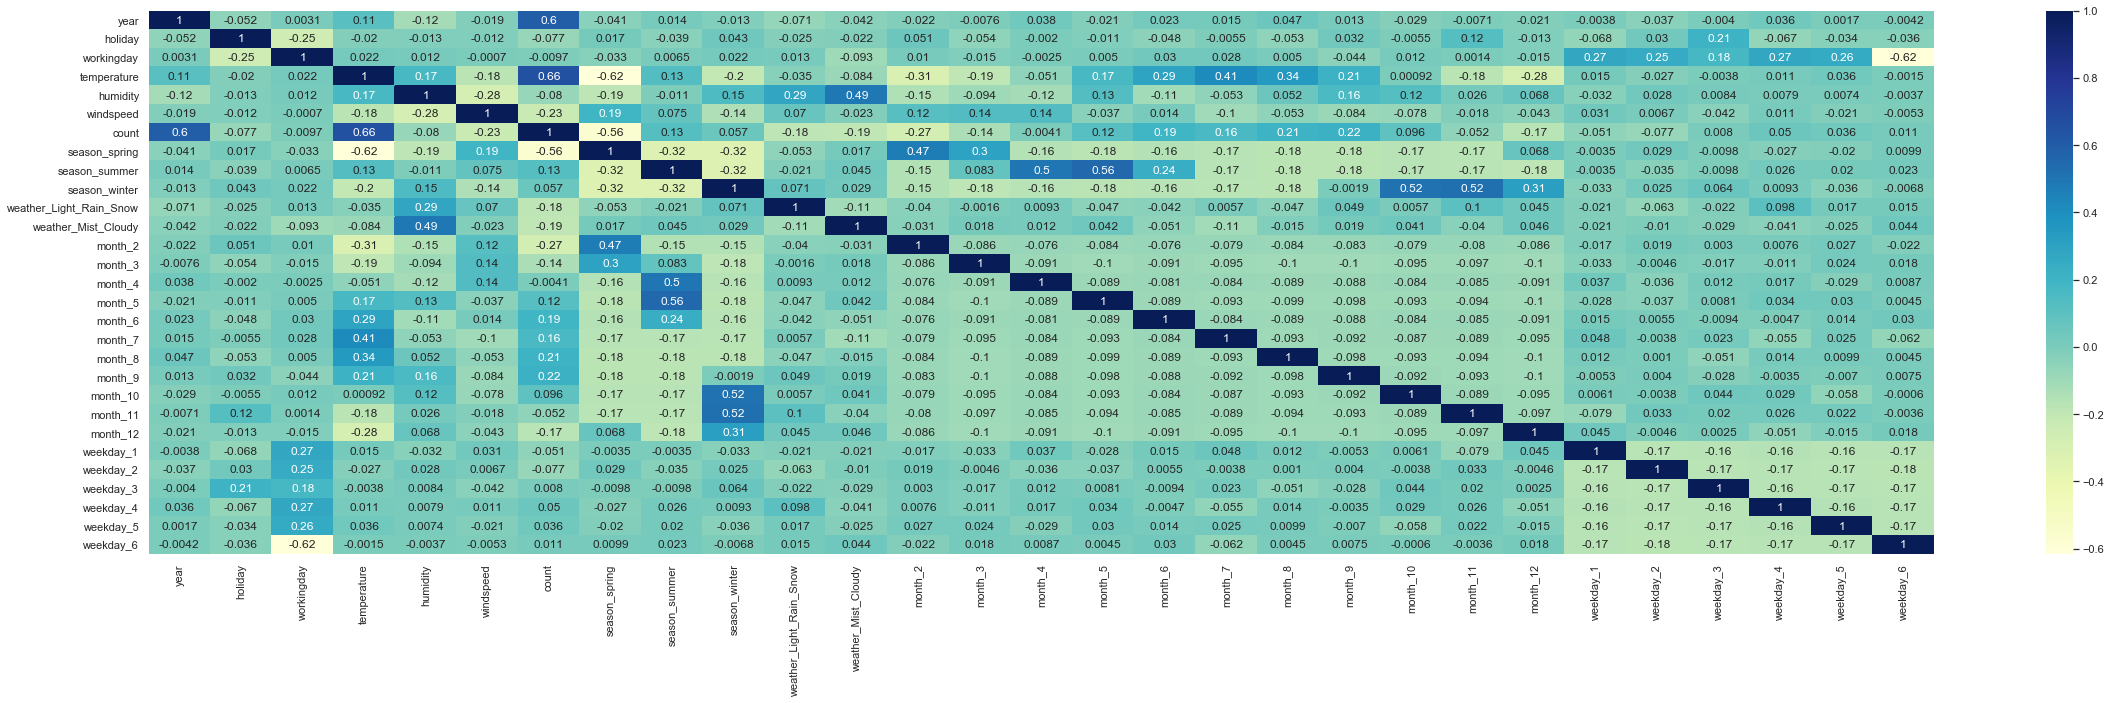

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temperature` seems to the correlated to `count` the most(0.66).

### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('count')
X_train = df_train

### Recursive Feature Elimination(RFE):

Identify the top significant features using RFE ( Recursive Feature Elimination) - automated approach

In [33]:
## Identify top significant features using rfe
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [34]:
RFE = pd.DataFrame()
RFE['features'] = X_train.columns
RFE['support'] = rfe.support_
RFE['ranking'] = rfe.ranking_
RFE.sort_values('ranking')

,features,support,ranking
0,year,True,1
1,holiday,True,1
19,month_10,True,1
3,temperature,True,1
4,humidity,True,1
5,windspeed,True,1
6,season_spring,True,1
18,month_9,True,1
8,season_winter,True,1
9,weather_Light_Rain_Snow,True,1


In [35]:
select_var = list(RFE[RFE['ranking']==1].features.reset_index(drop=True))
select_var

['year',
 'holiday',
 'temperature',
 'humidity',
 'windspeed',
 'season_spring',
 'season_winter',
 'weather_Light_Rain_Snow',
 'weather_Mist_Cloudy',
 'month_3',
 'month_5',
 'month_6',
 'month_8',
 'month_9',
 'month_10']

Now we have our top features that will help us to analyze the relation between the predictors and the dependent variable, let's build our regression model.

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [36]:
#Considering only featured variables into the train-data
X_train_var = X_train[select_var]

In [37]:
# Add a constant which has high correlation with count
X_train_lm = sm.add_constant(X_train_var[['temperature']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [38]:
# Check the parameters obtained
lr.params

const         1403.1057
temperature   5800.3085
dtype: float64

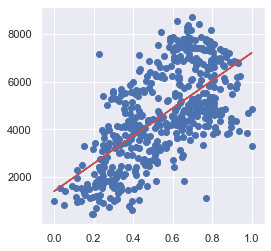

In [39]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize=[4,4])
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 1403.1057 + 5800.3085*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [40]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     386.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           2.11e-64
Time:                        10:57:53   Log-Likelihood:                -4443.1
No. Observations:                 510   AIC:                             8890.
Df Residuals:                     508   BIC:                             8899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1403.1057    172.491      8.134      

### Adding another variable

The R-squared value obtained is `0.432`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `year`.

In [41]:
# Assign another feature variables to X
X_train_lm = X_train_var[['temperature', 'year']]

In [42]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const         631.4529 
temperature   5270.5640
year          2068.0508
dtype: float64

In [43]:
# Print a summary of the linear regression model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     618.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.35e-137
Time:                        10:57:53   Log-Likelihood:                -4272.3
No. Observations:                 510   AIC:                             8551.
Df Residuals:                     507   BIC:                             8563.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         631.4529    128.408      4.918      

### Adding all the variables to the model

In [44]:
# Check all the columns of the dataframe
X_train_var.columns

Index(['year', 'holiday', 'temperature', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'weather_Light_Rain_Snow',
       'weather_Mist_Cloudy', 'month_3', 'month_5', 'month_6', 'month_8',
       'month_9', 'month_10'],
      dtype='object')

In [45]:
# Assign all the feature variables to X
# Build a linear model
X_train_lm = sm.add_constant(X_train_var)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const                     2715.1616 
year                      1992.3397 
holiday                   -530.5751 
temperature               3649.2827 
humidity                  -1389.3163
windspeed                 -1250.4104
season_spring             -929.8202 
season_winter             521.6720  
weather_Light_Rain_Snow   -1565.0515
weather_Mist_Cloudy       -387.4656 
month_3                   493.4245  
month_5                   659.6020  
month_6                   457.5672  
month_8                   422.4797  
month_9                   993.5472  
month_10                  488.9640  
dtype: float64

In [46]:
# Print a summary of the linear regression model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.44e-187
Time:                        10:57:53   Log-Likelihood:                -4116.2
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     494   BIC:                             8332.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

1. Now we have a good r-squared value- 0.842, i.e, 84% variance in 'count' column can be explained by all other variables.

2. Looking at the p-values(<0.05), it looks like the variables are significant (in the presence of other variables).


##### Hypothesis testing with p-value:

Assume that the slope is 0 :
1. Null Hypothesis (H0): β1=0 (p>0.05) -->Variables are insignificant. 

2. Alternate Hypothesis (HA): β1≠0 (p<0.05) -->Variables are significant.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_var.columns
vif['VIF'] = [variance_inflation_factor(X_train_var.values, i) for i in range(X_train_var.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,17.4000
2,temperature,13.5900
4,windspeed,3.9800
6,season_winter,2.7000
5,season_spring,2.6000
8,weather_Mist_Cloudy,2.4300
0,year,2.1000
12,month_8,1.6200
14,month_10,1.5600
10,month_5,1.5400


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. We have three categories:
    
   1. high p-value and low VIF 
   2. low p-value and low VIF 
   3. high p-value and high VIF 
    
   In this case p-value of all features looks good, so let's drop columns with high VIF.

In [48]:
#dropping columns with VIF > 5 . Temperature has high correlation with count. So keeping that, let's drop 'humidity' and 'windspeed'
X = X_train_var.drop(['humidity'], 1,)
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          6.08e-183
Time:                        10:57:53   Log-Likelihood:                -4128.8
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     495   BIC:                             8351.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [49]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temperature,6.1700
3,windspeed,3.9600
0,year,2.0900
5,season_winter,2.0500
4,season_spring,1.8600
11,month_8,1.6200
13,month_10,1.5500
7,weather_Mist_Cloudy,1.5200
10,month_6,1.4900
9,month_5,1.4600


 By eliminating Humidity in this model, We dont see a huge difference in R-squared while the VIFs of other variables like temperatures have decreased. Hence this is a good elimination.

In [50]:
# Model 5 - Eliminate month_5
X = X_train_var.drop('month_5', 1,)
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          8.70e-184
Time:                        10:57:53   Log-Likelihood:                -4126.8
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     495   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [51]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,16.4900
2,temperature,13.4900
4,windspeed,3.9600
6,season_winter,2.4300
8,weather_Mist_Cloudy,2.4200
5,season_spring,2.3900
0,year,2.1000
13,month_10,1.5500
11,month_8,1.4300
10,month_6,1.3700


Model-5 By eliminating 'month_5' in this model, although p-value for month_6 and month_8 has been increased but there is slight increase in r-squared value. We can drop month_6 and month_8 and let's see what happens.

In [52]:
X = X_train_var.drop(['month_6','month_8'], 1,)
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.88e-187
Time:                        10:57:53   Log-Likelihood:                -4122.5
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     496   BIC:                             8332.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [53]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,17.2200
2,temperature,11.5200
4,windspeed,3.9700
6,season_winter,2.5300
5,season_spring,2.5100
8,weather_Mist_Cloudy,2.4300
0,year,2.1000
12,month_10,1.5400
10,month_5,1.3100
7,weather_Light_Rain_Snow,1.3000


In [54]:
#Check by dropping month_10
X = X_train_var.drop('month_10', 1,)
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.25e-186
Time:                        10:57:53   Log-Likelihood:                -4121.3
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     495   BIC:                             8336.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [55]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,17.3600
2,temperature,13.2700
4,windspeed,3.9700
5,season_spring,2.5900
8,weather_Mist_Cloudy,2.4300
6,season_winter,2.2200
0,year,2.0900
12,month_8,1.6100
10,month_5,1.5300
11,month_6,1.4900


In [56]:
#Now, we need less that 10 features to describe the dependency, so drop those columns in the final model
X = X_train_var.drop(['humidity','month_5','month_6','month_8','month_10'], 1,)
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.75e-182
Time:                        10:57:53   Log-Likelihood:                -4141.5
No. Observations:                 510   AIC:                             8305.
Df Residuals:                     499   BIC:                             8352.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [57]:
# Calculate the VIFs again for the final model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.9200
2,temperature,3.9100
0,year,2.0800
4,season_spring,1.7500
7,weather_Mist_Cloudy,1.5000
5,season_winter,1.3400
8,month_3,1.2400
9,month_9,1.1600
6,weather_Light_Rain_Snow,1.0600
1,holiday,1.0400


#### Observations about the Final Models:

1. R-squared of the model(80.5%) and adjusted R-sqaured(80.1%) indicate that the selected 10 features are significant for prediction.
2. P(F-statistic) of the model is close to 0 which indicates that this model is a good fit.
3. Coefficients of the features indicate how they are related with count.
4. Positive coefficients indicates that the demand for bike increses with increase in those features
5. Weather situation (weather_Light_Rain_Snow,weather_Mist_Cloudy) with negative coefficient indicates less demand for bikes during these conditions.
6. Year with coefficient 2019.13 indicating that the bike demand has increased from last year and is expected to increase in future.

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [58]:
#Residual analysis
y_train_cnt = lr_2.predict(X_train_lm)     #predicted value
y_train_res = y_train - y_train_cnt        #difference between the predicted value and the actual value

#### Assumptions of Linear Regression:

Linear regression model is based on the following assumption and we will prove these assumptions with the model we built:

1. Linear relationship between X and Y: This was proved in the pair plot
2. Error terms are normally distributed
3. Error terms are independent of each other
4. Error terms have constant variance (homoscedasticity)

We need to observe whether our model satisfy above conditions or not !!

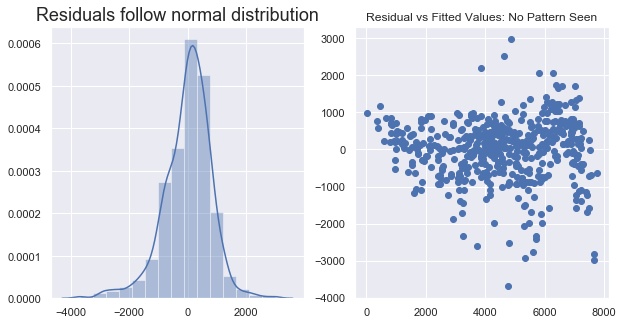

In [59]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(y_train_res, bins = 15) # Plot the histogram of the error terms
plt.title('Residuals follow normal distribution', fontsize = 18)
plt.subplot(122) 
plt.scatter(y_train_cnt, y_train_res) # Residual vs Fitted Values
plt.plot([0,0],'r') # draw line at 0,0 to show that residuals have constant variance
plt.title('Residual vs Fitted Values: No Pattern Seen')
plt.show()

#### INFERENCES:

1. From first plot, it can be proved that Residuals follow normal distribution and centered around zero
2. From second plot, it can be proved that Residuals do not follow any pattern indicating error terms are independent
3. Also from second plot, we can see that Error terms have constant variance and do not exhibit Heteroskedasticity

#### Metrics of Train Dataset :
Root mean square error ( RMSE ),Mean absolute error (MAE),r2_score

In [60]:
#Root mean square error ( RMSE )
from math import sqrt
train_rmse = sqrt(mean_squared_error(y_train,y_train_cnt))
print('Root mean square error :',train_rmse)

Root mean square error : 813.7291574959495


In [61]:
# Mean absolute error (MAE)
train_mae=mean_absolute_error(y_train,y_train_cnt)
print('Mean absolute error :',train_mae)

Mean absolute error : 603.1510235845116


In [62]:
#r2_score
train_r2 = round(r2_score(y_train, y_train_cnt),3)
print('R2 Score :',train_r2)


R2 Score : 0.826


In [63]:
#Instantiate
lm = LinearRegression()
#Fit a line
lm.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
lm.score(X_train_lm,y_train)

0.8259545470054379

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Testing the model using Test Dataset


In [65]:
df_test.head(2)

,year,holiday,workingday,temperature,humidity,windspeed,count,season_spring,season_summer,season_winter,weather_Light_Rain_Snow,weather_Mist_Cloudy,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
185,0,0,1,34.8169,59.0417,8.4593,4665,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
639,1,0,1,27.1166,87.1667,6.9998,4639,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


#### Applying the scaling on the test sets

In [66]:
#making prediction
num_vars = ['temperature', 'humidity', 'windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [67]:
df_test.describe()

,year,holiday,workingday,temperature,humidity,windspeed,count,season_spring,season_summer,season_winter,weather_Light_Rain_Snow,weather_Mist_Cloudy,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000
mean,0.4749,0.0320,0.6986,0.5151,0.4885,0.4258,4445.9178,0.2511,0.2740,0.2374,0.0411,0.3105,0.1005,0.0594,0.1005,0.0731,0.1005,0.0959,0.0731,0.0685,0.0959,0.0822,0.0639,0.1553,0.1279,0.1416,0.1553,0.1461,0.1279
std,0.5005,0.1763,0.4599,0.2277,0.2033,0.1856,1886.1705,0.4347,0.4470,0.4265,0.1990,0.4638,0.3013,0.2368,0.3013,0.2608,0.3013,0.2951,0.2608,0.2532,0.2951,0.2753,0.2452,0.3630,0.3347,0.3494,0.3630,0.3540,0.3347
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,22.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.3113,0.3358,0.3011,3170.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,1.0000,0.5372,0.4725,0.4073,4548.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.6870,0.6329,0.5212,5692.0000,0.5000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,8227.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### Dividing into X_test and y_test

In [68]:
y_test = df_test.pop('count')
X_test = df_test

In [69]:
y_test.shape

(219,)

In [70]:
# Adding constant variable to test dataframe
X_test_var = X_test[select_var]
X_test_ml = sm.add_constant(X_test_var)

In [71]:
# Creating X_test_ml dataframe by dropping variables from X_test_ml

X_test_ml = X_test_ml.drop(['humidity','month_5','month_6','month_8','month_10'], axis = 1)

In [72]:
# Making predictions using the model

y_pred_ml = lr_2.predict(X_test_ml)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

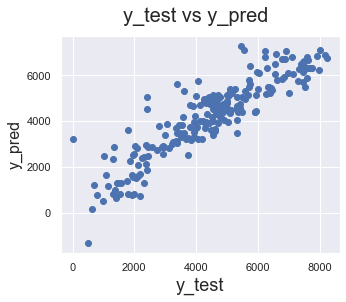

In [73]:
#model evaluation
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=[5,4])
plt.scatter(y_test, y_pred_ml)
plt.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

#### We can see the best-fitted line is:

##### count = 2140.15 + (2019.13 × year)  - (519.43 × holiday) + (3734.87 × temperature) - (896.11 × windspeed) -    (1111.07 × season_spring) + (402.04 × season_winter) - (2272.44 × weather_Light_Rain_Snow) - (642.59 × weather_Mist_Cloudy) + (388.10 × month_3) + (637.5 × month_9)  

### Comparison of R2 Metrics between Train and Test Dataset

In [74]:
test_r2 = round(r2_score(y_true=y_test, y_pred=y_pred_ml),2)
train_r2 = round(r2_score(y_true=y_train, y_pred=y_train_cnt),2)
print('R2 Score of Train and Test Datasets are:',train_r2,' and ',test_r2)

R2 Score of Train and Test Datasets are: 0.83  and  0.79


## Conclusion
In conclusion, for USA market, Data suggests the following remarks on demand of rental bikes:

1. Year by Year, The demand for rental bikes is increasing which is a good sign for the market.
2. People of USA dont really prefer using Rental bikes on Holidays, So discounts or offers for people to use rental bikes on Holidays can be used to attract more customers.
3. People of USA, prefer using rental bikes in higher temperatures. So, plans should be made to attract customers during days with lower temperatures.
4. With higher windspeed, customers tend to not use rental bikes.
5. Summer and Winter seasons have been preferred by customers to use rental bikes
6. Weather Situations like Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist , Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds are impacting the rental bike count.
7. September has been found as the month in which customers are likely to use rental bikes more.